# Cutting


## Cutting

GRANAD offers different materials. They can be defined in different dimensions. The process by which a finite flake is cut from an "infinite" bulk differs by dimensionality. This process is run by calling the `cut_flake` method. To see why, let's inspect

In [1]:
from granad import MaterialCatalog
ssh = MaterialCatalog.get("ssh")
help(ssh.cut_flake)

Help on method cut_flake in module granad.materials:

cut_flake() method of granad.materials.Material instance
    Finalizes the material construction by defining a method to cut a flake of the material,
    according to the material's dimensions like this

    1D material : materials.cut_flake_1d
    2D material : materials.cut_flake_2d
    3D material and higher : materials.cut_flake_generic

    This method is intended to be called after all material properties (like lattice constants,
    basis, orbitals, and interactions) have been fully defined.

    Note:
    This method does not take any parameters and does not return any value. Its effect is
    internal to the state of the Material object and is meant to prepare the material for
    simulation by implementing necessary final structural adjustments.



So, the cut_flake method is automatically determined. Let's look at the 1D case

In [2]:
from granad.materials import cut_flake_1d
help(cut_flake_1d)

Help on function cut_flake_1d in module granad.materials:

cut_flake_1d(material, unit_cells, plot=False)
    Cuts a one-dimensional flake from the material based on the specified number of unit cells
    and optionally plots the lattice and orbital positions.

    Parameters:
        material (Material): The material instance from which to cut the flake.
        unit_cells (int): The number of unit cells to include in the flake.
        plot (bool, optional): If True, displays a plot of the orbital positions within the lattice.
                               Default is False.

    Returns:
        list: A list of orbitals positioned within the specified range of the material's lattice.

    Note:
        The function utilizes internal methods of the `Material` class to compute positions and
        retrieve orbital data, ensuring that the positions are unique and correctly mapped to the
        material's grid.



We need to specify the number of unit cells. 

In [3]:
flake = ssh.cut_flake( unit_cells = 40, plot = False)

You may notice this is the configuration without edge states in the band gap

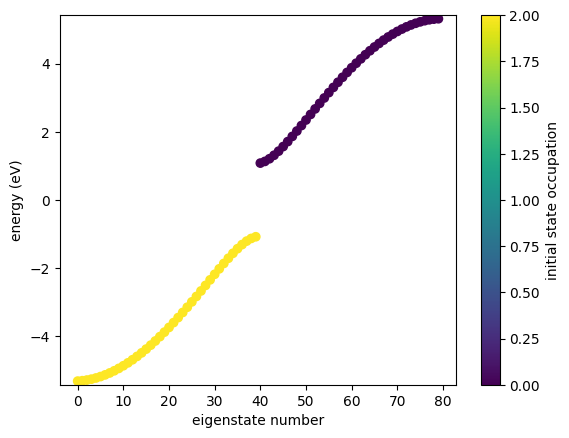

In [4]:
flake.show_energies()

You can create a topologically nontrivial configuration sustaining edge states by removing the first and the last orbital in the list

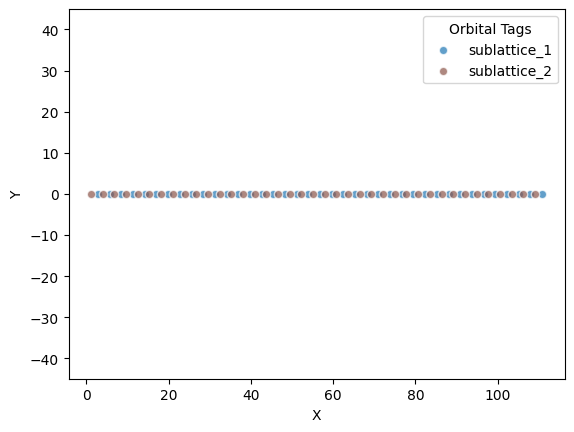

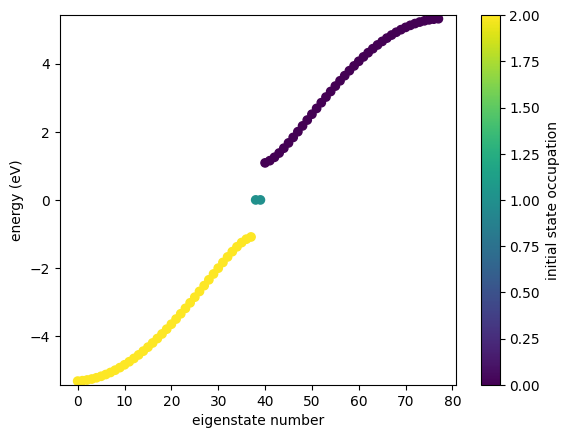

In [5]:
del flake[0]
del flake[-1]
flake.show_2d()
flake.show_energies()

We now cover cutting in 2D.

In [6]:
from granad.materials import cut_flake_2d
help(cut_flake_2d)

Help on function cut_flake_2d in module granad.materials:

cut_flake_2d(material, polygon, plot=False, minimum_neighbor_number: int = 2)
    Cuts a two-dimensional flake from the material defined within the bounds of a specified polygon.
    It further prunes the positions to ensure that each atom has at least the specified minimum number of neighbors.
    Optionally, the function can plot the initial and final positions of the atoms within the polygon.

    Parameters:
        material (Material): The material instance from which to cut the flake.
        polygon (Polygon): A polygon objects with a vertices property holding an array of coordinates defining the vertices of the polygon within which to cut the flake.
        plot (bool, optional): If True, plots the lattice and the positions of atoms before and after pruning.
                               Default is False.
        minimum_neighbor_number (int, optional): The minimum number of neighbors each atom must have to remain in t

This is more complex. We can give an arbitrary polygon to the cutting function, so let's do this by approximating a potato.

In [7]:
import jax.numpy as jnp
from granad import Polygon
potato = Polygon(
    10 * jnp.array( [
        (3, 1),    # Bottom center (widest point)
        (2, 2),    # Lower left bulge
        (1, 3),    # Mid left indent
        (2, 4),    # Upper left bulge
        (3, 5),    # Top center
        (4, 4),    # Upper right bulge
        (5, 3),    # Mid right indent
        (4, 2),    # Lower right bulge
        (3, 1)     # Connect back to the bottom center
    ])
)

Now, we cut a flake

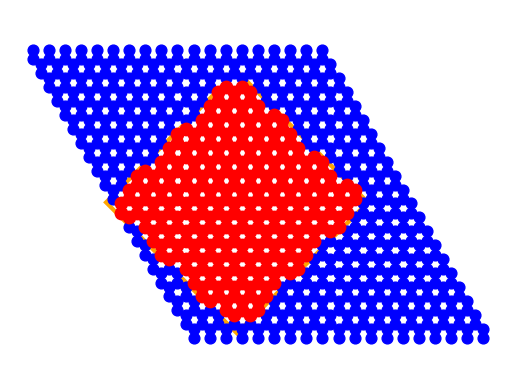

In [8]:
graphene = MaterialCatalog.get("graphene")
flake = graphene.cut_flake( potato, plot = True )


## Shapes

Built-in shapes cover Triangles, Hexagons, Rectangles, (approximate) Circles and Parallelograms. Specialized to hexagonal lattices, they can be cut with zigzag, armchair or bearded edges. They are implemented as functions returning a Polygon object holding a set of vertices. All parameters you pass to them are in Angström.

In [9]:
from granad import Rectangle
help(Rectangle)

Help on function Rectangle in module granad.shapes:

Rectangle(length_x, length_y)
    Generates the vertices of a rectangle given the lengths along the x and y dimensions.

    The rectangle is centered at the origin, and the function is designed to be used with
    the @_edge_type decorator, allowing for positional shifts and rotations (if specified).

    Parameters:
        length_x (float): The length of the rectangle along the x-axis, specified in angstroms.
        length_y (float): The length of the rectangle along the y-axis, specified in angstroms.

    Returns:
        jax.numpy.ndarray: An array of shape (5, 2), representing the vertices of the rectangle,
                           starting and ending at the same vertex to facilitate drawing closed shapes.

    Note:
        ```python
        # Rectangle with length 2.0 and height 1.0 angstroms
        rectangle = Rectangle(2.0, 1.0)
        ```



Note: The "extent" of the shape refers to its minimum dimensions. For instance, when working with graphene, which has a bond length of approximately 1.42 Å, you should specify dimensions that avoid cutting into very small fragments, such as a single benzene ring (~2.46 Å in diameter). For meaningful simulations, ensure that the shape dimensions exceed this scale.

## Bearded configurations

Cutting removes "dangling" atoms by default. Dangling atoms are defined by their neighbor number: if they have only one neighbor, they are removed. If you want to deactivate this to keep "bearded" configurations, do

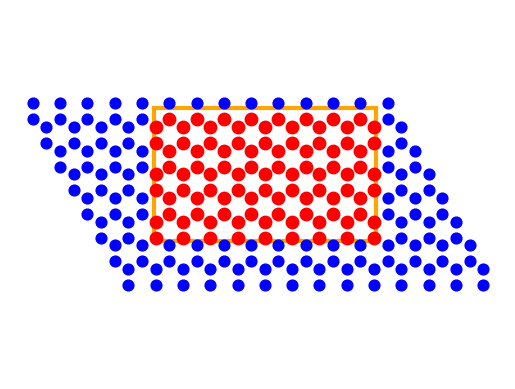

In [10]:
flake = graphene.cut_flake( Rectangle(10,12), plot = True, minimum_neighbor_number = 0 )